# Prosper Loan Data Exploration
## by Sarah Hazem

## Preliminary Wrangling

> The Prosper Loan Dataset contains 113,937 loans with 81 variables for each loan. These variables include loan amount, borrower rate, borrower income, credit grade, loan amount, and more. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#loading dataset into pandas dataframe 
loan = pd.read_csv("prosperLoanData.csv")

In [3]:
#inspecting dataframe 
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### A. Subsetting Dataframe

**Too many variables that will not be relevant to our analysis, instead we'll select only 15 of these variables to narrow down our analysis and get more informative results.**

In [4]:
#subsetting relevant variables to our analysis from the original dataset 
columns = ["ListingNumber", "ListingCreationDate", "LoanStatus", "BorrowerAPR", "ProsperRating (Alpha)",
           "ListingCategory (numeric)", "StatedMonthlyIncome", "ProsperScore", "IncomeRange",
         "EmploymentStatus", "Occupation", "DebtToIncomeRatio", "LoanOriginalAmount", "MonthlyLoanPayment"]
loan = loan[columns]

In [5]:
#inpsecting resulting dataset 
loan.head()

,ListingNumber,ListingCreationDate,LoanStatus,BorrowerAPR,ProsperRating (Alpha),ListingCategory (numeric),StatedMonthlyIncome,ProsperScore,IncomeRange,EmploymentStatus,Occupation,DebtToIncomeRatio,LoanOriginalAmount,MonthlyLoanPayment
0,193129,2007-08-26 19:09:29.263000000,Completed,0.16516,NaN,0,3083.333333,NaN,"$25,000-49,999",Self-employed,Other,0.17,9425,330.43
1,1209647,2014-02-27 08:28:07.900000000,Current,0.12016,A,2,6125.000000,7.0,"$50,000-74,999",Employed,Professional,0.18,10000,318.93
2,81716,2007-01-05 15:00:47.090000000,Completed,0.28269,NaN,0,2083.333333,NaN,Not displayed,Not available,Other,0.06,3001,123.32
3,658116,2012-10-22 11:02:35.010000000,Current,0.12528,A,16,2875.000000,9.0,"$25,000-49,999",Employed,Skilled Labor,0.15,10000,321.45
4,909464,2013-09-14 18:38:39.097000000,Current,0.24614,D,2,9583.333333,4.0,"$100,000+",Employed,Executive,0.26,15000,563.97


In [6]:
#further inspection of resulting dataframe
loan.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerAPR                113912 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   StatedMonthlyIncome        113937 non-null  float64
 7   ProsperScore               84853 non-null   float64
 8   IncomeRange                113937 non-null  object 
 9   EmploymentStatus           111682 non-null  object 
 10  Occupation                 110349 non-null  object 
 11  DebtToIncomeRatio          105383 non-null  float64
 12  LoanOriginalAmount         113937 non-null  int64  
 13  MonthlyLoanPayment         11

### B. Dealing with Missing Values

**We notice that a few variables have null values, so let's dig further into that.**

In [7]:
#checking for null values
loan.isnull().sum()

ListingNumber                    0
ListingCreationDate              0
LoanStatus                       0
BorrowerAPR                     25
ProsperRating (Alpha)        29084
ListingCategory (numeric)        0
StatedMonthlyIncome              0
ProsperScore                 29084
IncomeRange                      0
EmploymentStatus              2255
Occupation                    3588
DebtToIncomeRatio             8554
LoanOriginalAmount               0
MonthlyLoanPayment               0
dtype: int64

**We'll drop rows that have null values in ProsperScore or Prosper Rating as they are very important to our analysis and cannot be filled it with valuable entries.**

**Note: I used ProsperRating (Alpha) instead of Credit Grades given that they essentially hold the meaning but CreditGrade has a lot more null values.**

In [8]:
#dropping rows that have null values for prosper score
loan = loan[loan['ProsperScore'].notnull()]

In [9]:
#reinspecting null values 
loan.isnull().sum()

ListingNumber                   0
ListingCreationDate             0
LoanStatus                      0
BorrowerAPR                     0
ProsperRating (Alpha)           0
ListingCategory (numeric)       0
StatedMonthlyIncome             0
ProsperScore                    0
IncomeRange                     0
EmploymentStatus                0
Occupation                   1333
DebtToIncomeRatio            7296
LoanOriginalAmount              0
MonthlyLoanPayment              0
dtype: int64

**Now, we have only two variables that include null values: Occupation and DebtToIncomeRatio.**
* For Occupation, we'll just fill the missing values with "Other". 
* For DebtToIncomeRatio, we'll fill the missing values with the mean. 

In [10]:
#filling missing values in Occupation with unknown 
loan["Occupation"] = loan["Occupation"].astype(object).fillna("Other")

In [11]:
#filling missing values in debt to income ratio with the mean 
loan['DebtToIncomeRatio'].fillna((loan['DebtToIncomeRatio'].mean()), inplace=True)

In [12]:
#no more null values!
loan.isnull().sum()

ListingNumber                0
ListingCreationDate          0
LoanStatus                   0
BorrowerAPR                  0
ProsperRating (Alpha)        0
ListingCategory (numeric)    0
StatedMonthlyIncome          0
ProsperScore                 0
IncomeRange                  0
EmploymentStatus             0
Occupation                   0
DebtToIncomeRatio            0
LoanOriginalAmount           0
MonthlyLoanPayment           0
dtype: int64

### C. Dealing with Duplicated Rows

**Let's check for duplicate rows.**

In [13]:
#checking for duplicate values -- No duplicate rows found!
sum(loan.duplicated())

0

### D. Fixing Data Types

**Now, let's fix our datatypes! We two variables to fix ListingCreationDate and Listing Category.**
* We want to convert the Listing Creation date into two separate month and year columns. 
* We want to convert the Listing Category from a numeric variable to a categorical variable. 

In [14]:
#inspecting column data types 
loan.dtypes

ListingNumber                  int64
ListingCreationDate           object
LoanStatus                    object
BorrowerAPR                  float64
ProsperRating (Alpha)         object
ListingCategory (numeric)      int64
StatedMonthlyIncome          float64
ProsperScore                 float64
IncomeRange                   object
EmploymentStatus              object
Occupation                    object
DebtToIncomeRatio            float64
LoanOriginalAmount             int64
MonthlyLoanPayment           float64
dtype: object

In [15]:
#inpecting Listing Creation Date Column 
loan['ListingCreationDate']

1         2014-02-27 08:28:07.900000000
3         2012-10-22 11:02:35.010000000
4         2013-09-14 18:38:39.097000000
5         2013-12-14 08:26:37.093000000
6         2013-04-12 09:52:56.147000000
                      ...              
113932    2013-04-14 05:55:02.663000000
113933    2011-11-03 20:42:55.333000000
113934    2013-12-13 05:49:12.703000000
113935    2011-11-14 13:18:26.597000000
113936    2014-01-15 09:27:37.657000000
Name: ListingCreationDate, Length: 84853, dtype: object

**For our purposes, we only need the month and the year the listing was created in.**

In [16]:
#creating two new columns month and year by extracting them from the listing creation date column 
loan['year'] = loan['ListingCreationDate'].apply(lambda x: x.split("-")[0]).astype(str)
loan['month'] = loan['ListingCreationDate'].apply(lambda x: x.split("-")[1]).astype(str)

**To make our visualizations more clear, it's better to convert the month variable into a categorical variable including months by name: January, February, etc.**

In [17]:
#setting mapping dictionary and mapping months in months column from numeric values to string values 
months = {'01':'JAN', '02': 'FEB', '03': 'MAR', '04': 'APR', '05':'MAY', '06': 'JUN','07': 'JUL',
         '08': 'AUG', '09': 'SEP', '10': 'OCT', '11': 'NOV', '12': 'DEC'}
loan['month']= loan['month'].map(months)

**Source:** https://stackoverflow.com/questions/42684530/convert-a-column-in-a-python-pandas-from-string-month-into-int

In [18]:
#dropping original listing creation date 
loan = loan.drop(['ListingCreationDate'], axis=1)

**Now, let's convert the Listing Category Variable. We'll use the following data obtained from the Prosper Loan Data Variable Definitions:**
0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans


In [19]:
#inspecting current values of the listing category column 
loan['ListingCategory (numeric)'].unique()

array([ 2, 16,  1,  7, 13,  6, 15, 20, 19, 18,  3,  8, 11, 14,  9, 17, 10,
        0,  5, 12])

In [20]:
#setting mapping dictionary and mapping categories in listing category column from numeric values to string values 
category = {0:'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business',
          4:'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby & Adoption',
          9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans', 
         13: 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16: 'Motorcycle',
         17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}
loan['category']= loan['ListingCategory (numeric)'].map(category)

In [21]:
#dropping original listing category column 
loan = loan.drop(['ListingCategory (numeric)'], axis=1)

**Let's convert our ordinal categorical variables into ordered categorical types. The variables that need to be converted are: Prosper Rating, Employment Status, and Month.**

In [22]:
#checking for unique values in each ordinal variable
print(loan['ProsperRating (Alpha)'].unique())
print(loan['EmploymentStatus'].unique())
print(loan['month'].unique())
print(loan['year'].unique())
print(loan['IncomeRange'].unique())

['A' 'D' 'B' 'E' 'C' 'AA' 'HR']
['Employed' 'Other' 'Full-time' 'Self-employed' 'Not employed' 'Retired'
 'Part-time']
['FEB' 'OCT' 'SEP' 'DEC' 'APR' 'MAY' 'JUL' 'AUG' 'NOV' 'JAN' 'JUN' 'MAR']
['2014' '2012' '2013' '2010' '2011' '2009']
['$50,000-74,999' '$25,000-49,999' '$100,000+' '$75,000-99,999'
 '$1-24,999' 'Not employed' '$0']


In [23]:
#convert prosper rating, employment status, and month into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR','E','D','C','B', 'A', 'AA'],
                   'EmploymentStatus': ['Employed', 'Self-Employed', 'Full-time', 'Part-time','Not employed',
                                        'Retired', 'Other'],
                    'month': ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
                             'NOV', 'DEC'],
                  'year': ['2009','2010', '2011', '2012', '2013', '2014'],
                   'IncomeRange': ['Not employed', '$0', '$1-24,999','$25,000-49,999','$50,000-74,999',
                                 '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

### E. Adding Defaulting Column

In [24]:
#adding defaulting column
loan['LoanStatus'].unique()
loan['defaulted'] = np.where(loan['LoanStatus']== 'Defaulted', 1, 0)

In [25]:
#checking our new column 
loan['defaulted'].value_counts()

0    83848
1     1005
Name: defaulted, dtype: int64

### F. Renaming Columns

In [26]:
#renaming prosper rating column to lower case
loan.rename(columns={'ProsperRating (Alpha)':'prosper_rating'}, inplace=True)

### G. Final Data Inspection

In [27]:
# descriptive statistics for quantitative variables
loan.describe()

,ListingNumber,BorrowerAPR,StatedMonthlyIncome,ProsperScore,DebtToIncomeRatio,LoanOriginalAmount,MonthlyLoanPayment,defaulted
count,8.485300e+04,84853.000000,8.485300e+04,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000
mean,7.738749e+05,0.226658,5.931175e+03,5.950067,0.258752,9083.440515,291.930720,0.011844
std,2.363387e+05,0.079916,8.239944e+03,2.376501,0.304333,6287.860058,186.678314,0.108184
min,4.162750e+05,0.045830,0.000000e+00,1.000000,0.000000,1000.000000,0.000000,0.000000
25%,5.580860e+05,0.163280,3.434000e+03,4.000000,0.160000,4000.000000,157.330000,0.000000
50%,7.392460e+05,0.219450,5.000000e+03,6.000000,0.240000,7500.000000,251.940000,0.000000
75%,9.794360e+05,0.292540,7.083333e+03,8.000000,0.310000,13500.000000,388.350000,0.000000
max,1.255725e+06,0.423950,1.750003e+06,11.000000,10.010000,35000.000000,2251.510000,1.000000


In [28]:
#inspecting dataset shape
loan.shape

(84853, 16)

In [29]:
#inspecting final data set 
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ListingNumber        84853 non-null  int64   
 1   LoanStatus           84853 non-null  object  
 2   BorrowerAPR          84853 non-null  float64 
 3   prosper_rating       84853 non-null  category
 4   StatedMonthlyIncome  84853 non-null  float64 
 5   ProsperScore         84853 non-null  float64 
 6   IncomeRange          84853 non-null  category
 7   EmploymentStatus     80315 non-null  category
 8   Occupation           84853 non-null  object  
 9   DebtToIncomeRatio    84853 non-null  float64 
 10  LoanOriginalAmount   84853 non-null  int64   
 11  MonthlyLoanPayment   84853 non-null  float64 
 12  year                 84853 non-null  category
 13  month                84853 non-null  category
 14  category             84853 non-null  object  
 15  defaulted         

### What is the structure of your dataset?

> The original dataset has 113,937 loans with 81 variables for each loan. After preliminary wrangling, the dataset I'm using contains 84853 loans with 15 variables for each loan. There are five quantitative variables in our data set and ten qualitative variables, six of which are ordinal variables and four of which are nominal variables: 

> **Ordinal Variables**
* Prosper Rating: 'HR','E','D','C','B', 'A', 'AA' (ordered from worst to best) 
* Employment Status: 'Employed', 'Self-Employed', 'Full-time', 'Part-time','Not employed','Retired', 'Other' (ordered from best to worst) 
* Month: 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC' (ordered in month ordering)
* Year: from 2009 --> 2014
* Prosper Score: values ranging from 1-10, with 10 being the best, or lowest risk score. 
* Income Range

> **Nominal Variables** : The dataset also contains three nominal variables: Loan Status, Defaulted, Category, and Occupation. 

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are Borrower APR and Defaulted. We want to figure out how other variables are best for predicting the borrower APR offered by the lender and how different features affect whether or not a customer defaults on a loan. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> We believe that the prosper rating/score and the debt to income ratio will have a huge effect on the borrower APR. As for the defaulting, we believe that the monthly income/income range, employment status, and debt to income ratio will have the highest effects on a customer defaulting.

## Univariate Exploration

**Let's start by exploring our main variable of interest: Borrower APR. Given that it's a continuous quantitative variable, we'll use a histogram.**

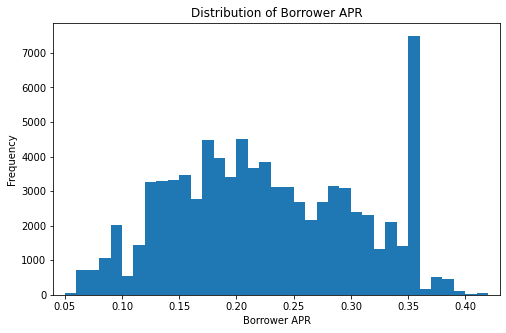

In [30]:
#plotting histogram for borrower APR
plt.figure(figsize=[8, 5])
bins = np.arange(0, loan['BorrowerAPR'].max()+0.05, 0.01)
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins);
plt.xlim([0.04, 0.43]);
plt.xlabel('Borrower APR');
plt.ylabel("Frequency");
plt.title("Distribution of Borrower APR");

From the previous histogram, we can see that the borrower APR distribution is multimodal with the highest peak between 0.35 and 0.36. The majority of the rates lie between 0.10 and 0.36 with just very below 0.10 and above 0.36. 

**Now, let's take a look at our second variable of interest: Defaulted. Given that it's a nominal binary qualitative variable, we'll use a pie chart to best depict its distribution.**

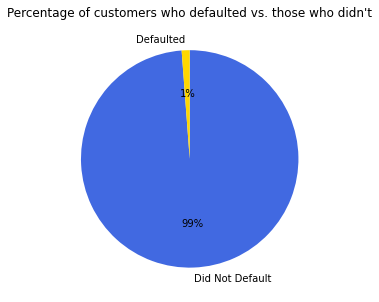

In [31]:
#pie chart for defaulted variable 
plt.figure(figsize=[8, 5])
values = loan['defaulted'].value_counts()
colors = ['royalblue', 'gold']
labels = ['Did Not Default', 'Defaulted']
plt.pie(values, labels = labels, startangle = 90, counterclock = False, colors = colors, autopct='%1.0f%%');
plt.title("Percentage of customers who defaulted vs. those who didn't");

As we can see, 99% of the customers did not default with only 1% of customers defaulting.

**Now, let's take a look at the distribution of the customer debt-to-income ratio. Given that it's a continuous quantitative variable, we'll use a histogram.**

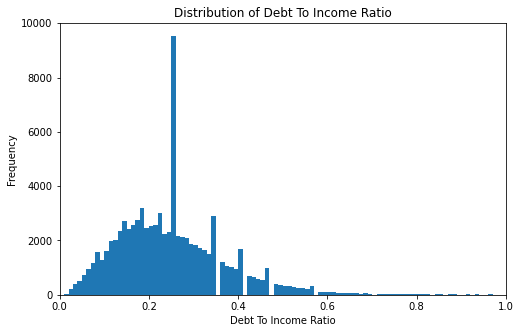

In [32]:
#plotting a histogram for debt-to-income ratio
plt.figure(figsize=[8, 5])
bins = np.arange(0, loan['DebtToIncomeRatio'].max()+0.05, 0.01)
plt.hist(data = loan, x = 'DebtToIncomeRatio', bins = bins);
plt.xlim([0, 1]);
plt.xlabel('Debt To Income Ratio');
plt.ylabel("Frequency");
plt.title("Distribution of Debt To Income Ratio");

As we can see, the distribution of the debt to income ratio is right skewed and unimodal with a peak at 0.2. There is an abnormally high peak between 0.2 and 0.3. Let's investigate this peak in the following graph. 

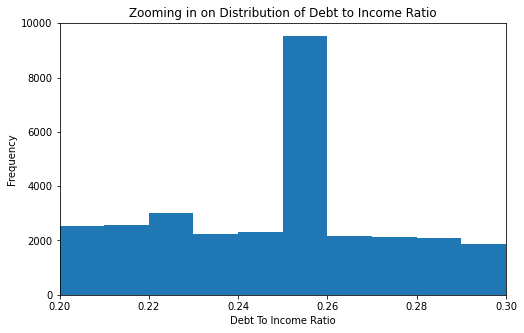

In [33]:
#inspecting debt to income ratio abnormal peak 
plt.figure(figsize=[8, 5])
bins = np.arange(0, loan['DebtToIncomeRatio'].max()+0.05, 0.01)
plt.hist(data = loan, x = 'DebtToIncomeRatio', bins = bins);
plt.xlim([0.2, 0.3]);
plt.xlabel('Debt To Income Ratio');
plt.ylabel("Frequency");
plt.title("Zooming in on Distribution of Debt to Income Ratio");

As we can see, the debt to income ratio has its highest peak at approximately 0.25. 

**Next, let's take a look at the distribution of the monthly income.**

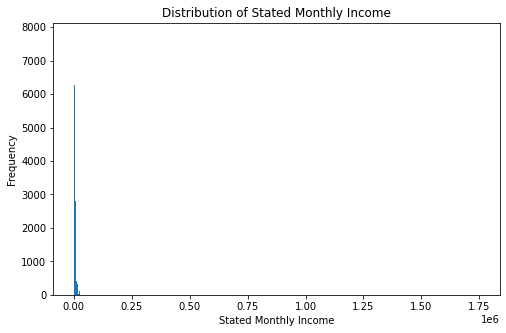

In [34]:
#plotting distribution of monthly income
plt.figure(figsize=[8, 5])
bins = np.arange(0, loan['StatedMonthlyIncome'].max(), 500)
plt.hist(data = loan, x = 'StatedMonthlyIncome', bins = bins);
plt.xlabel('Stated Monthly Income');
plt.ylabel("Frequency");
plt.title('Distribution of Stated Monthly Income');

The histogram we get is indecipherable. Let's explore why this occured.

In [35]:
#inspecting descriptive statistics of monthly income column 
loan['StatedMonthlyIncome'].describe()

count    8.485300e+04
mean     5.931175e+03
std      8.239944e+03
min      0.000000e+00
25%      3.434000e+03
50%      5.000000e+03
75%      7.083333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

As we can see the majority of the incomes lie around 5000 and the highest income is over 175,000, therefore messing up our distribution. Let's replot with a lower maximum to get a better look at our distribution.

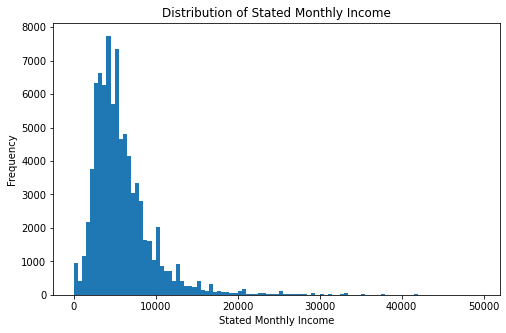

In [36]:
#Replotting distribution of monthly income
plt.figure(figsize=[8, 5])
bins = np.arange(0, 50000, 500)
plt.hist(data = loan, x = 'StatedMonthlyIncome', bins = bins);
plt.xlabel('Stated Monthly Income')
plt.ylabel("Frequency");
plt.title('Distribution of Stated Monthly Income');

As we can see the distribution of the stated monthly income is skewed to the right meaning the mean of the income is higher than the median which is expected with an income disribution. The highest peak is at around 5000. 

Note: An alternative approach to our previous plot would have been using a log transformation on our monthly income, but we are unable to to do that since some of the income values are zero.

**Let's take a look at the distribution of the income range to see if its gives us more insight into the distribution of the income**

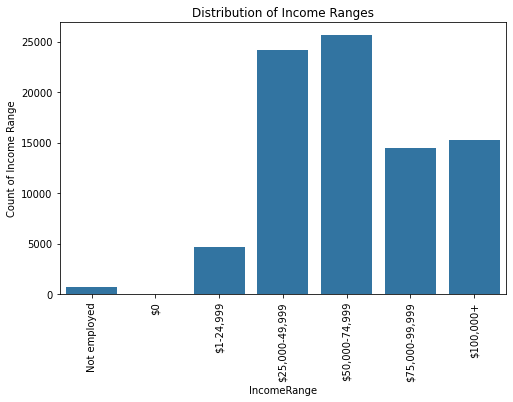

In [37]:
#plotting bar chart of income range 
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'IncomeRange', color = base_color);
plt.ylabel("Count of Income Range")
plt.title("Distribution of Income Ranges")
plt.xticks(rotation=90);

The distribution of the income range shows that most of the borrowers have an income between 50K and 75K, followed by 25K to 50K, with the least being unemployed. This data doesn't agree with the stated monthly income data, however, we'll use both separately to determine the effect of income on APR and defaulting.

**Next, let's take a look at the distribution of the loan original amount. Since it's a quantitative variable, we'll plot a histogram.**

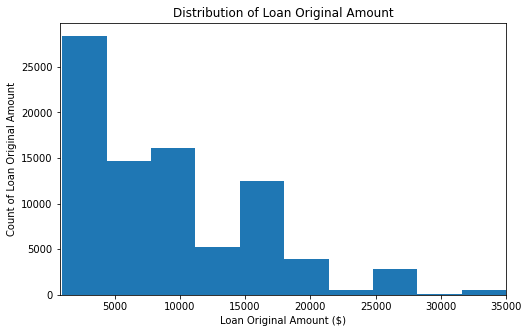

In [38]:
#plotting distribution of loan original amount
plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount');
plt.xlim([800, 35000])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Count of Loan Original Amount')
plt.title('Distribution of Loan Original Amount');

As we can see, the distribution is skewed to the right with most common loan amount at 1000. There are several other peaks at 10,000, 15,000, and 25,000.

**Next, let's take a look at the distributions of both prosper rating and prosper score since we expect them to have similar distributions.**

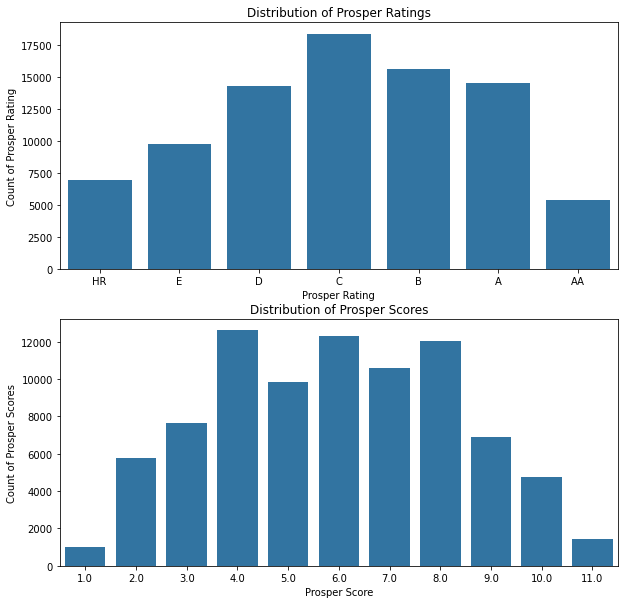

In [39]:
# plotting prosper rating and prosper score to compare their distributions
fig, ax = plt.subplots(nrows=2, figsize = [10,10])

base_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'prosper_rating', color = base_color, ax = ax[0])
ax[0].set_xlabel("Prosper Rating");
ax[0].set_ylabel("Count of Prosper Rating");
ax[0].set_title("Distribution of Prosper Ratings");

sb.countplot(data = loan, x = 'ProsperScore', color = base_color, ax = ax[1])
ax[1].set_xlabel("Prosper Score");
ax[1].set_ylabel("Count of Prosper Scores");
ax[1].set_title("Distribution of Prosper Scores");
plt.show()

As we expected, the distributions are pretty similar, however the distribution of the prosper rating is approximately normal with the majority of the customers having a prosper rating between D and A, and the highest at C. 
The distribution of the prosper score is multimodal having three peaks at 4.0, 6.0, and 8.0. 

**Next, let's take a look at the distribution of our four ordinal variables. Since we're plotting ordinal variables, we'll use a bar chart using seaborn's countplot function.**

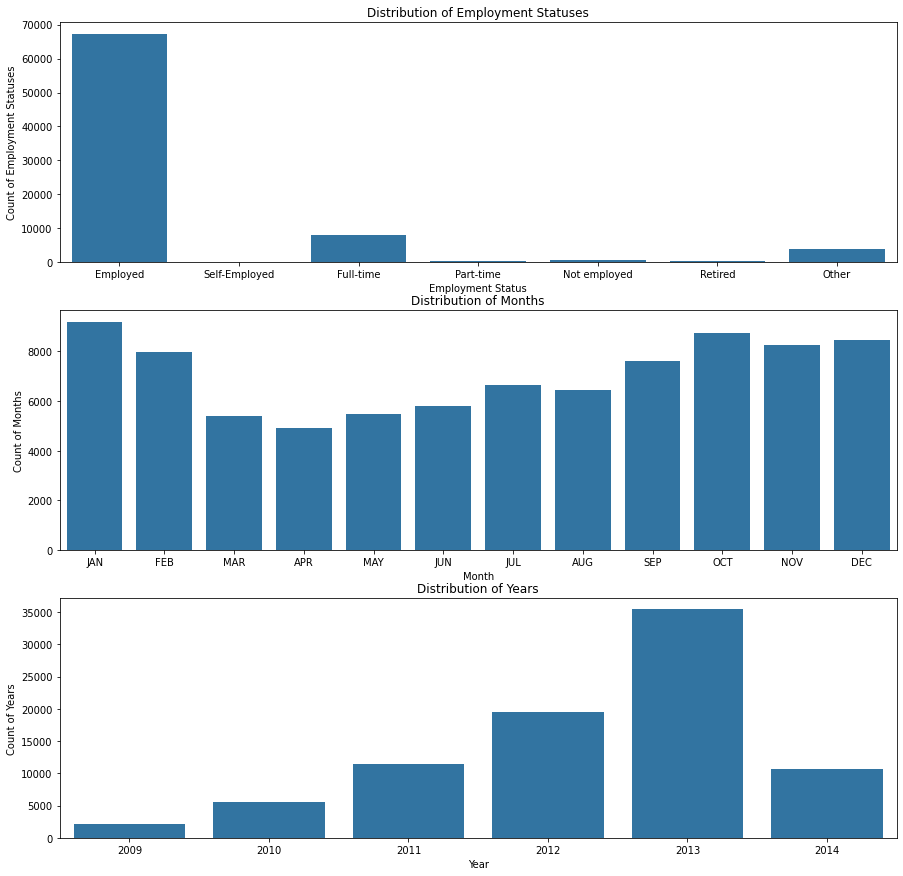

In [40]:
# plotting our remaining three ordinal variables together to get an idea of their distributions
fig, ax = plt.subplots(nrows=3, figsize = [15,15])

default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'EmploymentStatus', color = base_color, ax = ax[0])
ax[0].set_xlabel("Employment Status");
ax[0].set_ylabel("Count of Employment Statuses");
ax[0].set_title("Distribution of Employment Statuses");

sb.countplot(data = loan, x = 'month', color = base_color, ax = ax[1])
ax[1].set_xlabel("Month");
ax[1].set_ylabel("Count of Months");
ax[1].set_title("Distribution of Months");

sb.countplot(data = loan, x = 'year', color = base_color, ax = ax[2])
ax[2].set_xlabel("Year");
ax[2].set_ylabel("Count of Years");
ax[2].set_title("Distribution of Years");

plt.show()

We can infer the following from the previous graph: 
* The majority of the customers are employed.
* The loans were made throughout the year with no significant trend, but January had the highest number of loans and April had the least number of loans.
* Loans increased gradually from 2009 to 2013, peaking at 2013, then going down in 2014.

**Lastly, let's take at the distribution of our remaining three nominal variables. Since we're plotting nominal variables, we'll use a bar chart using seaborn's countplot function.**

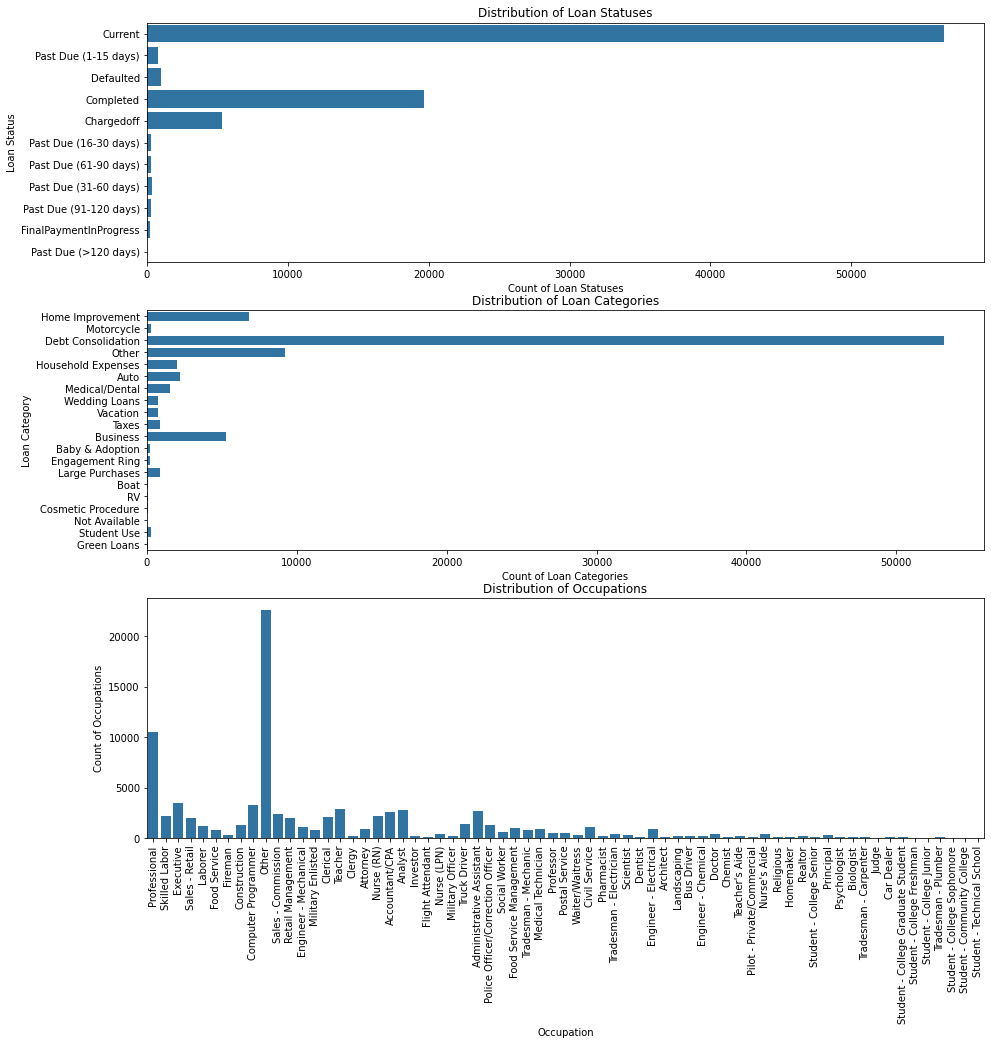

In [41]:
# plotting our three nominal variables together to get an idea of their distributions
fig, ax = plt.subplots(nrows=3, figsize = [15,15])

default_color = sb.color_palette()[0]
sb.countplot(data = loan, y = 'LoanStatus', color = base_color, ax = ax[0])
ax[0].set_ylabel("Loan Status");
ax[0].set_xlabel("Count of Loan Statuses");
ax[0].set_title("Distribution of Loan Statuses");

sb.countplot(data = loan, y = 'category', color = base_color, ax = ax[1])
ax[1].set_xlabel("Count of Loan Categories");
ax[1].set_ylabel("Loan Category");
ax[1].set_title("Distribution of Loan Categories");

sb.countplot(data = loan, x = 'Occupation', color = base_color, ax = ax[2])
plt.xticks(rotation=90);
ax[2].set_xlabel("Occupation");
ax[2].set_ylabel("Count of Occupations");
ax[2].set_title("Distribution of Occupations");

plt.show()

We can infer the following from the previous bar charts: 
* Most of the loans have a current status, followed by completed and charged off. Almost none of the loans are past 120 days. 
* Most of the loans were made for the purpose of debt consolidation, followed by home improvement and business.
* Most of the borrowers had an occupation of professional with the least being students.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* The distribution of the borrower APR is skewed to the right and multimodal with most of the points between 0.10 and 0.36. No unusual pounts were detected and therefore no transformations were required. 
* Our second variable, the defaulted variable, is a binary variable with 99% of the variables as not defaulted and 1% as defaulted.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* The distribution of the debt-to-income ratio is right skewed and unimodal with a peak at 0.2. There is an abnormally high peak at 0.25 meaning most borrowers have a debt-to-income ratio of 25%. 
* The distribution of the stated monthly income is skewed to the right meaning the mean of the income is higher than the median which is expected with an income disribution. The highest peak is at around 5000 and the highest income is over 175,000. Given that the range of values is huge, a log transformation would have been appropriate, however since some of the values were zero, we couldn't perform a log transformation without sacrificing some of the data. Moreover, we considered limiting the data to up to an income to 50,000 given that the majority of the incomes were below 50,000. However, after evaluating the income range, we found out the majority of people had incomes between 50K to 75K. So we decided to evaluate both variables separately.

## Bivariate Exploration


**Let's start by looking at the pairwise correlations present between numeric features in the data.**

In [42]:
#creating an array with the labels of our quantitative variables
numeric_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'MonthlyLoanPayment']

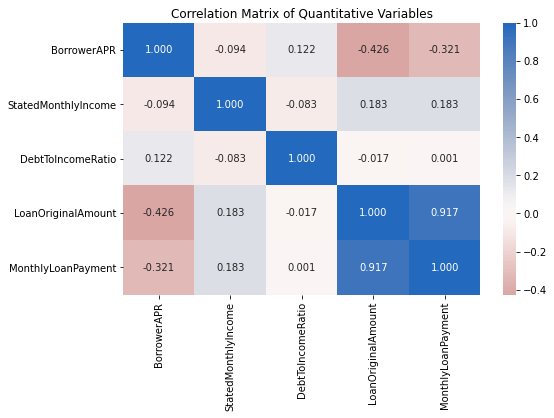

In [43]:
# correlation plot
plt.figure(figsize = [8, 5])
plt.title("Correlation Matrix of Quantitative Variables")
sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

From the correlation plot, we can see that: 
* The highest positive correlation is between loan original amount and monthly loan payment which is expected. 
* The highest negative correlation is between borrower APR and the loan original amount, meaning the higher the loan amount, the lower the APR and vice versa. 
* The loan original amount and the stated monthly income are positively correlated which makes sense as the higher the person's income the bigger the amount of loan they can borrow. However, the correlation is considered weak as it's only 0.183. 
* The rest of the correlations are pretty low to deduct any useful information from them.

**Next, let's use faceting to plot scatterplots between our quantitative variables.**

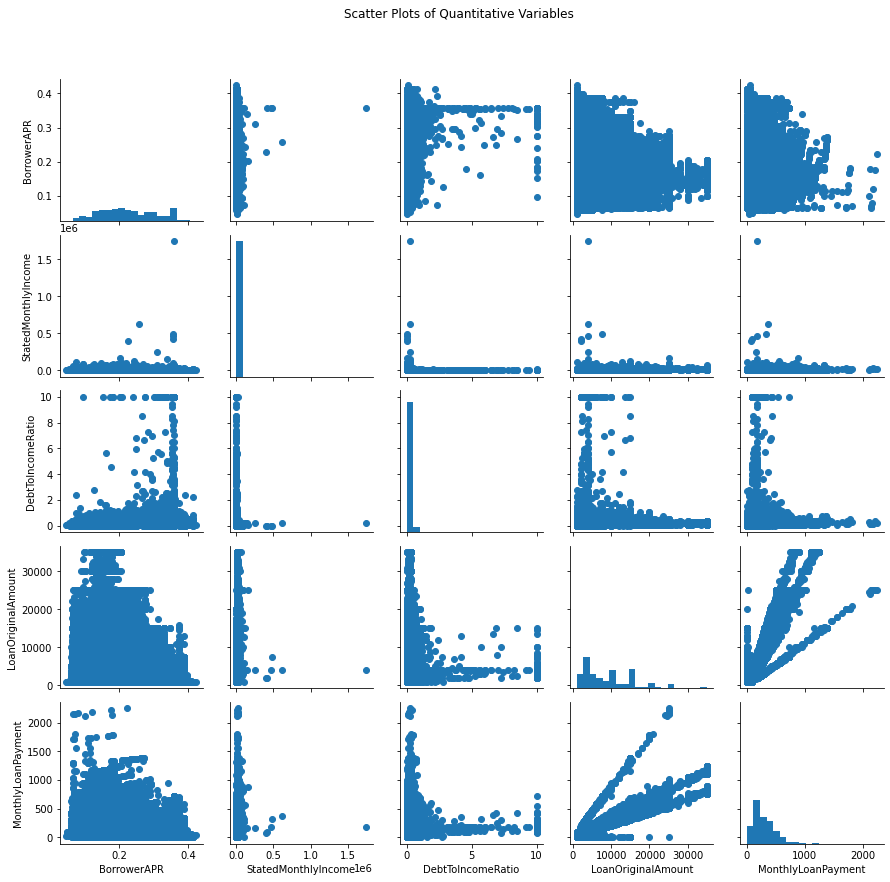

In [44]:
#plotting scatterplots between all of our quantitative variables and add some transparency 
g = sb.PairGrid(data = loan, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);
g.fig.suptitle("Scatter Plots of Quantitative Variables");
g.fig.subplots_adjust(top=0.9);

> The results of our scatterplots reinforce the results generated by the correlation matrix. There seems to be a positive correlation between loan original amount and stated monthly income, a negative relationship between borrower APR and loan original amount, and the expected positive relationship between loan original amount and monthly loan payment. Therefore, we'll drop working with our monthly loan payment and continue with our loan original amount only.
> Overall, the correlations are not that strong, so we'll need further investigation with the other variables to come up with concrete conclusions.

**Let's further examine the relationship between borrower APR and loan original amount.**

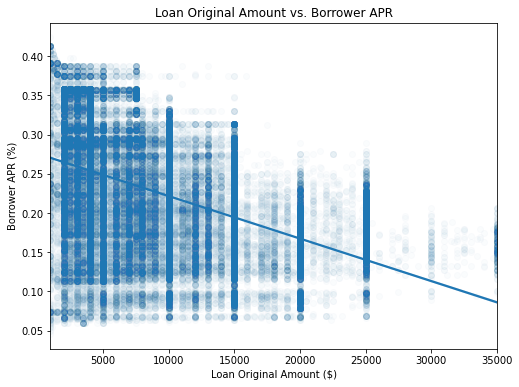

In [45]:
#plotting scatterplot with a regression fitted line
plt.figure(figsize=[8, 6])
sb.regplot(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':1/50});
plt.xlabel('Loan Original Amount ($)');
plt.ylabel('Borrower APR (%)');
plt.title("Loan Original Amount vs. Borrower APR");

The above plot reinforces our observation of the negative correlation between borrower APR and loan original amount.

**Let's further examine the relationship between  between loan original amount and stated monthly income.**

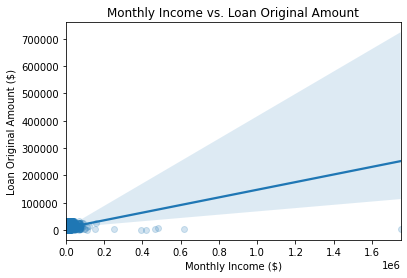

In [46]:
#plotting scatterplot with a regression fitted line
sb.regplot(data = loan, y = 'LoanOriginalAmount', x = 'StatedMonthlyIncome', scatter_kws={'alpha':1/5})
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('Monthly Income ($)');
plt.title("Monthly Income vs. Loan Original Amount");

The above plot reinforces our observation of the weak correlation between loan original amount and stated monthly income.

**Let's compare our previous results by looking at how income range correlates with both borrower apr and loan original amount**

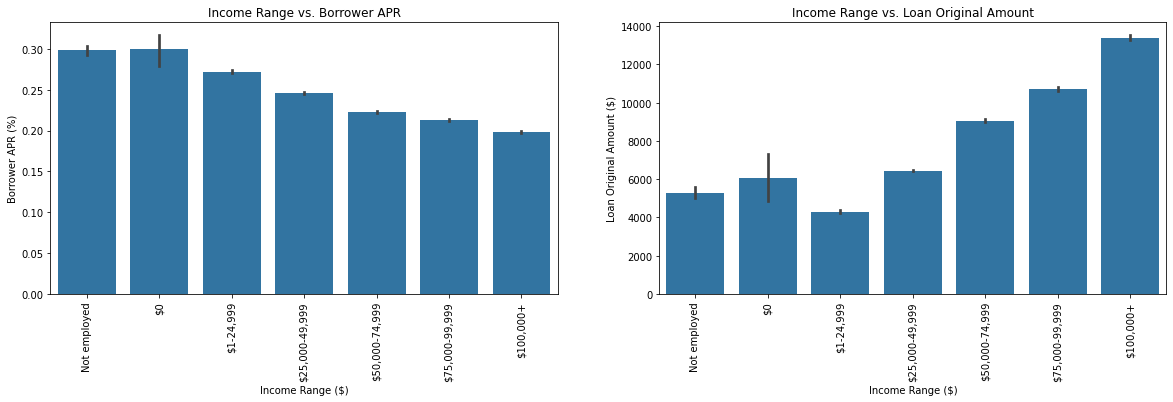

In [47]:
#plotting two adapted bar charts 
base_color = sb.color_palette()[0]
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
sb.barplot(data=loan, x='IncomeRange', y='BorrowerAPR', color = base_color);
plt.xticks(rotation = 90);
plt.ylabel('Borrower APR (%)')
plt.xlabel('Income Range ($)');
plt.title("Income Range vs. Borrower APR");

plt.subplot(1, 2, 2)
sb.barplot(data=loan, x='IncomeRange', y='LoanOriginalAmount', color = base_color);
plt.xticks(rotation = 90);
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('Income Range ($)');
plt.title("Income Range vs. Loan Original Amount");

* For the borrower APR, we can see that there is a negative relationship between borrower APR and income range with the exception of people who are unemployed or have an income of zero, as they have the highest APRs. After that, the APR seems to decrease gradually as income increases.
* As for the loan original amount, there is a significant positive relationship between loan original amount and income range again with the exception of people who are unemployed or have an income of zero. 

**Next up, let's see if there's a relationship between borrower APR and debt to income ratio.**

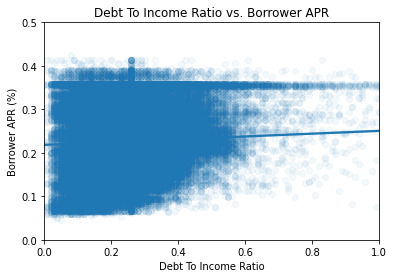

In [48]:
#plotting scatterplot with a regression fitted line
sb.regplot(data = loan, x = 'DebtToIncomeRatio', y = 'BorrowerAPR', scatter_kws={'alpha':1/20})
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Borrower APR (%)');
plt.title("Debt To Income Ratio vs. Borrower APR")
plt.xlim([0,1]);
plt.ylim([0,0.5]);

As we can see, there's a very weak positive correlation between debt to income ratio and borrower APR and no significant information can be inferred from this graph. 

**Let's take a look at how our categorical variables relate with our main variable of interest borrower APR.** 

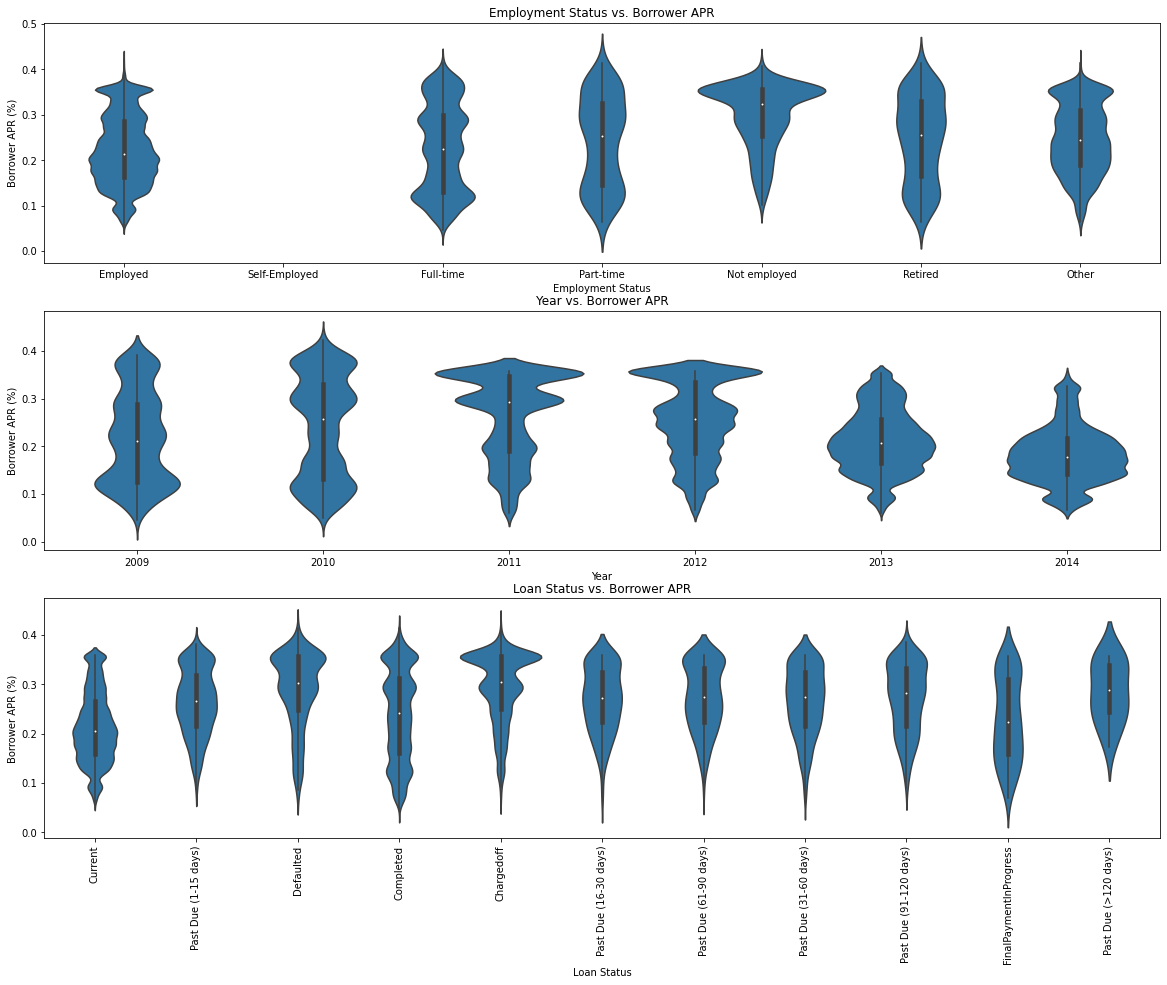

In [49]:
#plotting violin plots with borrower apr and categorical variables
base_color = sb.color_palette()[0]
plt.figure(figsize = [20, 15])

plt.subplot(3, 1, 1)
sb.violinplot(data=loan, x='EmploymentStatus', y='BorrowerAPR', color = base_color);
plt.xlabel('Employment Status')
plt.ylabel('Borrower APR (%)');
plt.title("Employment Status vs. Borrower APR");

plt.subplot(3, 1, 2)
sb.violinplot(data=loan, x='year', y='BorrowerAPR', color = base_color);
plt.xlabel('Year')
plt.ylabel('Borrower APR (%)');
plt.title("Year vs. Borrower APR");

plt.subplot(3, 1, 3)
sb.violinplot(data=loan, x='LoanStatus', y='BorrowerAPR', color = base_color);
plt.xticks(rotation = 90 );
plt.xlabel('Loan Status');
plt.ylabel('Borrower APR (%)');
plt.title("Loan Status vs. Borrower APR");


We can infer the following from the previous violin plots: 
* On average, non-employed people have higher APRs than all other employment statuses.
* The mean borrower APR increase from 2009 to 2011, then gradually decreased from 2011 to 2014. 
* Customers who defaulted had on averages higher APRs than customers who completed their loans. 

**Let's take a look at how our quantitative variables correlate with our categorical defaulted variable. We'll use adapted bar charts.**

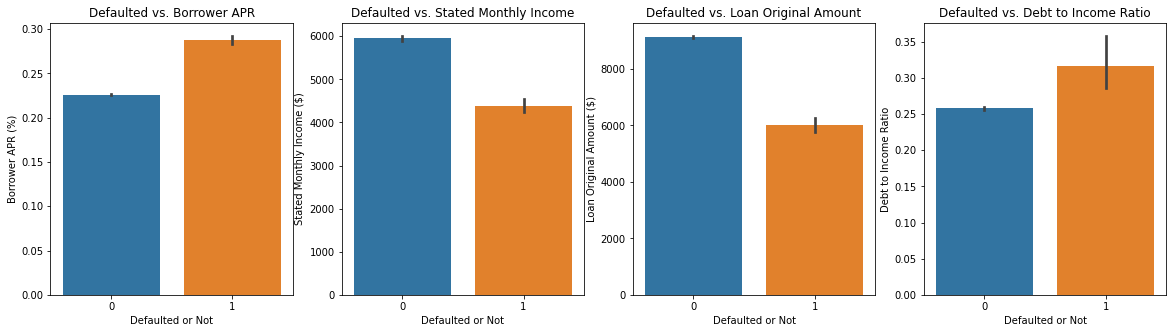

In [50]:
#box plot between defaulted and quantitative variables
plt.figure(figsize = [20, 5])
plt.subplot(1, 4, 1)
sb.barplot(data=loan, x='defaulted', y='BorrowerAPR');
plt.xlabel('Defaulted or Not')
plt.ylabel('Borrower APR (%)');
plt.title("Defaulted vs. Borrower APR");

plt.subplot(1, 4, 2)
sb.barplot(data=loan, x='defaulted', y='StatedMonthlyIncome');
plt.xlabel('Defaulted or Not')
plt.ylabel('Stated Monthly Income ($)');
plt.title("Defaulted vs. Stated Monthly Income");

plt.subplot(1, 4, 3)
sb.barplot(data=loan, x='defaulted', y='LoanOriginalAmount');
plt.xlabel('Defaulted or Not')
plt.ylabel('Loan Original Amount ($)');
plt.title("Defaulted vs. Loan Original Amount");

plt.subplot(1, 4, 4)
sb.barplot(data=loan, x='defaulted', y='DebtToIncomeRatio');
plt.xlabel('Defaulted or Not')
plt.ylabel('Debt to Income Ratio');
plt.title("Defaulted vs. Debt to Income Ratio");

From the above bar charts, we can see that: 
* Customers who defaulted had on average a higher APR.
* Customers who defaulted had on average a lower Monthly Income.
* Customers who defaulted were given on average a smaller loan.
* Customers who defaulted had on average a higher debt to income ratio.

**Next up, let's take a look at how our categorical variables relate to our defaulted variable.**

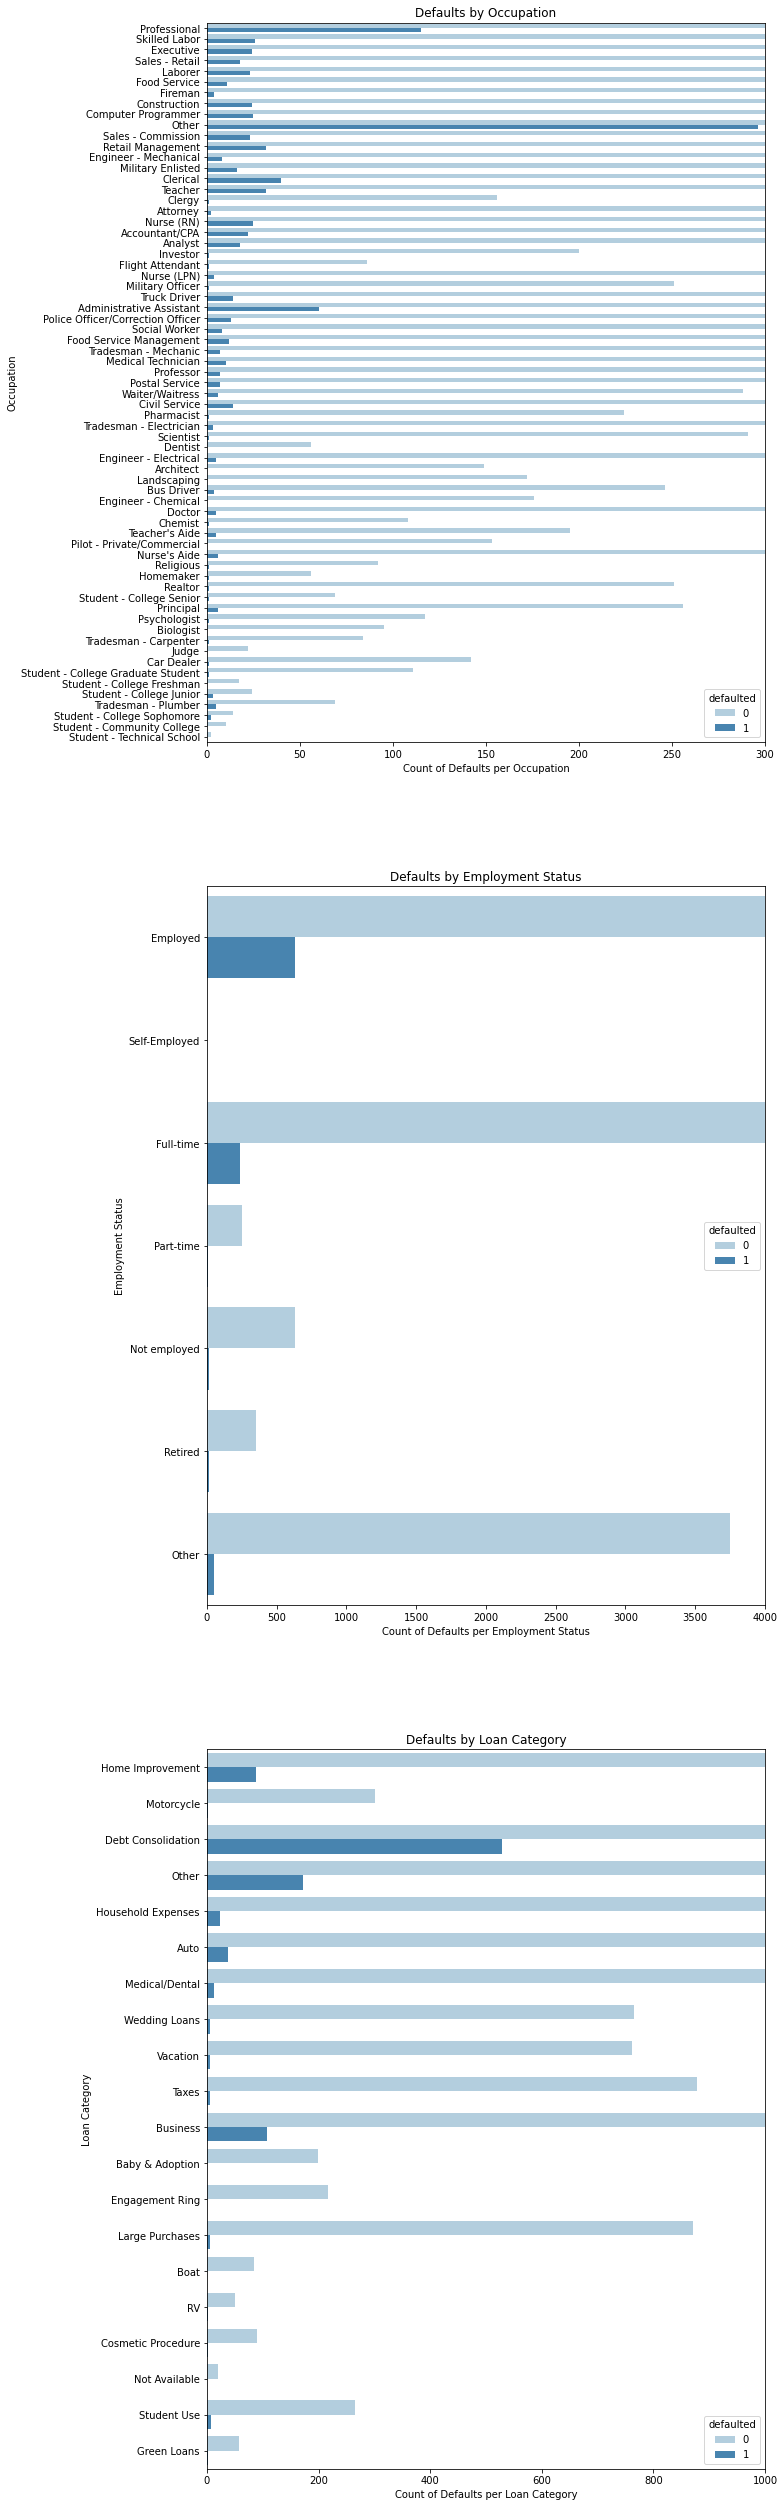

In [51]:
#plotting clustered bar charts of three categorical variables with defaulted variable
plt.figure(figsize = [10, 45])

plt.subplot(3, 1, 1)
sb.countplot(data = loan, y = 'Occupation', hue = 'defaulted', palette = 'Blues')
plt.xlim([0, 300])
plt.xlabel('Count of Defaults per Occupation')
plt.ylabel('Occupation');
plt.title("Defaults by Occupation");

plt.subplot(3, 1, 2)
sb.countplot(data = loan, y = 'EmploymentStatus', hue = 'defaulted', palette = 'Blues')
plt.xlim([0, 4000])
plt.xlabel('Count of Defaults per Employment Status')
plt.ylabel('Employment Status');
plt.title("Defaults by Employment Status");

plt.subplot(3, 1, 3)
sb.countplot(data = loan, y = 'category', hue = 'defaulted', palette = 'Blues')
plt.xlim([0, 1000])
plt.xlabel('Count of Defaults per Loan Category')
plt.ylabel('Loan Category');
plt.title("Defaults by Loan Category");

plt.show()

We can infer the following from the previous bar charts: 
* For occupation, the majority of those who defaulted were label as Other which doesn't add much to our analysis. However, ignoring others, the occupation with the most defaults seems to be Professionals, followed by administrative assistants, and clericals. 
* For employment status, the most common status of those who defaulted is employed, followed by full time. Retired and non-employed people have much lower defaulting rates. 
* For loan category, the most common category of those who defaulted is debt consolidation, which makes sense given that these are people who are in debt and probably have a high debt to income ratio. 

**Next, let's take a look at how prosper rating and prosper score relate to our most important variable: Borrower APR.**

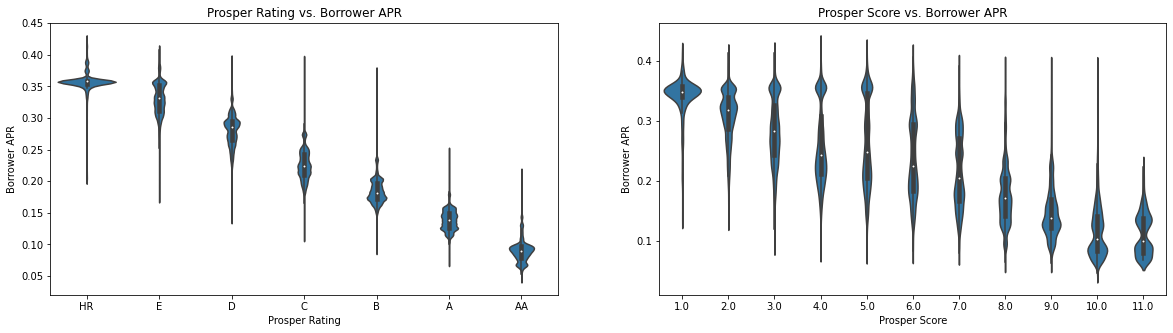

In [52]:
#plotting violin plot between borrower apr and prosper rating and prosper score
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]
plt.subplot(1, 2, 1)
sb.violinplot(data=loan, x='prosper_rating', y='BorrowerAPR', color = base_color);
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR');
plt.title("Prosper Rating vs. Borrower APR");


plt.subplot(1, 2, 2)
sb.violinplot(data=loan, x='ProsperScore', y='BorrowerAPR', color = base_color);
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR');
plt.title("Prosper Score vs. Borrower APR");

There seems to be a negative correlation between prosper rating and borrower APR, and prosper score and borrower APR, meaning the higher the rating, the lower the APR and vice versa. Such a conclusion was expected as the prosper rating estimates the level of risk of a loan and therefore the higher the risk, the higher the APR should be.

**Next, let's take a look at how prosper rating and prosper score relate to our most second important variable: defaulted.**

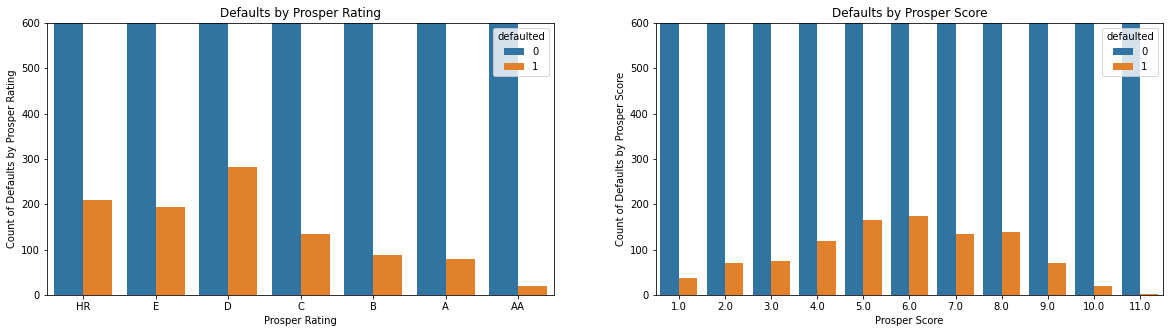

In [53]:
#plotting two clustered bar charts 
plt.figure(figsize = [20, 5])
plt.subplot(1, 2, 1)
sb.countplot(data = loan, x = 'prosper_rating', hue = 'defaulted');
plt.ylim([0, 600]);
plt.xlabel("Prosper Rating");
plt.ylabel("Count of Defaults by Prosper Rating");
plt.title("Defaults by Prosper Rating");

plt.subplot(1, 2, 2)
sb.countplot(data = loan, x = 'ProsperScore', hue = 'defaulted');
plt.ylim([0, 600]);
plt.xlabel("Prosper Score");
plt.ylabel("Count of Defaults by Prosper Score");
plt.title("Defaults by Prosper Score");

* For the prosper rating, most of the customers who defaulted had a rating of D, which is pretty interesting, given that people with lower risk rating had lower probability of defaulting. The lowest category that defaulted were people with a prosper rating of AA. There doesn't seem to be a linear relationship between prosper rating and defaulting.
* For the prosper score, it follows almost a normal distribution with the majority of defaults occuring at those with a prosper score of 5-6, which coincides with our previous observation of people defaulting with a rating of D. 
* Overall, it seems like people whose rating or score lies in the middle have the highest probability of defaulting. 

**Lastly, let's take a look at the relationship between our categorical variables.**

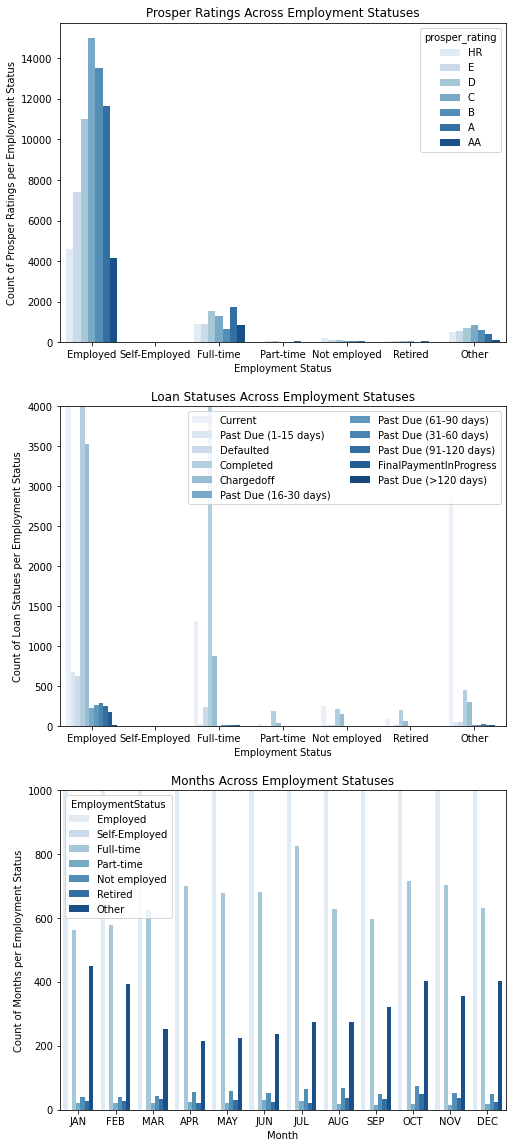

In [54]:
#plotting three clustered bar charts between our categorical variables 
plt.figure(figsize = [8, 20])

plt.subplot(3, 1, 1)
sb.countplot(data = loan, x = 'EmploymentStatus', hue = 'prosper_rating', palette = 'Blues')
plt.title("Prosper Ratings Across Employment Statuses")
plt.ylabel("Count of Prosper Ratings per Employment Status")
plt.xlabel("Employment Status")


ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan, hue = 'LoanStatus', x = 'EmploymentStatus', palette = 'Blues')
plt.ylim([0,10000])
ax.legend(ncol = 2)
plt.ylim([0,4000])
plt.title("Loan Statuses Across Employment Statuses")
plt.ylabel("Count of Loan Statues per Employment Status")
plt.xlabel("Employment Status")

ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan, hue = 'EmploymentStatus', x = 'month', palette = 'Blues')
plt.ylim([0,1000])
plt.title("Months Across Employment Statuses")
plt.ylabel("Count of Months per Employment Status")
plt.xlabel("Month")

plt.show()

We can infer the following from the previous clustered bar charts: 
* For employment status, employed people have a normal distribution across prosper ratings. For full-time employees, there seems to be a peak at the rating of A. 
* There is no significant information to be inferred from the employment status and loan status relationship.
* For months and employment status, employed and full time people take loans throughout the year. There is no significant information to be inferred from the employment status and month relationship.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> **First Variable of Interest: Borrower APR:** 
- There is a high negative correlation between borrower APR and the loan original amount, meaning the higher the loan amount, the lower the APR and vice versa.
- There is a negative correlation between borrower APR and income range with the exception of people who are unemployed or have an income of zero, as they have the highest APRs. After that, the APR seems to decrease gradually as income increases.
- On average, non-employed people have higher APRs than all other employment statuses.
- The mean borrower APR increase from 2009 to 2011, then gradually decreased from 2011 to 2014.
- Customers who defaulted had on averages higher APRs than customers who completed their loans.
- There is a negative correlation between prosper rating and borrower APR, and prosper score and borrower APR, meaning the higher the rating, the lower the APR and vice versa.


> **Second Variable of Interest: Defaulted:** 
- Customers who defaulted had on average a higher APR.
- Customers who defaulted had on average a lower Monthly Income.
- Customers who defaulted were given on average a smaller loan.
- Customers who defaulted had on average a higher debt to income ratio.
- The most common Employment Status of those who defaulted is employed, followed by full time. Retired and non-employed people have much lower defaulting rates.
- The most common Occupation for those who defaulted is Professionals, followed by administrative assistants, and clericals.
- The most common loan category for those who defaulted is debt consolidation, which makes sense given that these are people who are in debt and probably have a high debt to income ratio.
- For the prosper rating, most of the customers who defaulted had a rating of D. The lowest category that defaulted were people with a prosper rating of AA. 
- For the prosper score, it follows almost a normal distribution with the majority of defaults occuring at those with a prosper score of 5-6, which coincides with our previous observation of people defaulting with a rating of D.
- Overall, it seems like people whose prosper rating or score lies in the middle have the highest probability of defaulting.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> **We've observed the following relationships between the other features:** 
- There is a high positive correlation is between loan original amount and monthly loan payment which is expected.
- The loan original amount and the stated monthly income are positively correlated which makes sense as the higher the person's income the bigger the amount of loan they can borrow. 
- There is a significant positive relationship between loan original amount and income range again with the exception of people who are unemployed or have an income of zero.
- Employed people have a normal distribution across prosper ratings. For full-time employees, there seems to be a peak at the rating of A.


## Multivariate Exploration

> **In this part of this analysis, I want to explore how four categorical measures: Defaulting, Prosper Rating, Employment Status, Income Range, play into the relationship between Borrower APR and Loan Original Amount.**


> **Note: I'm choosing these categorical variables because in the previous part they proved to have the strongest relationships with APR. Moreover, I used prosper rating and dropped prosper score because they essentially communicate the same information and prosper rating is better for visualizations as its non-numerical.** 

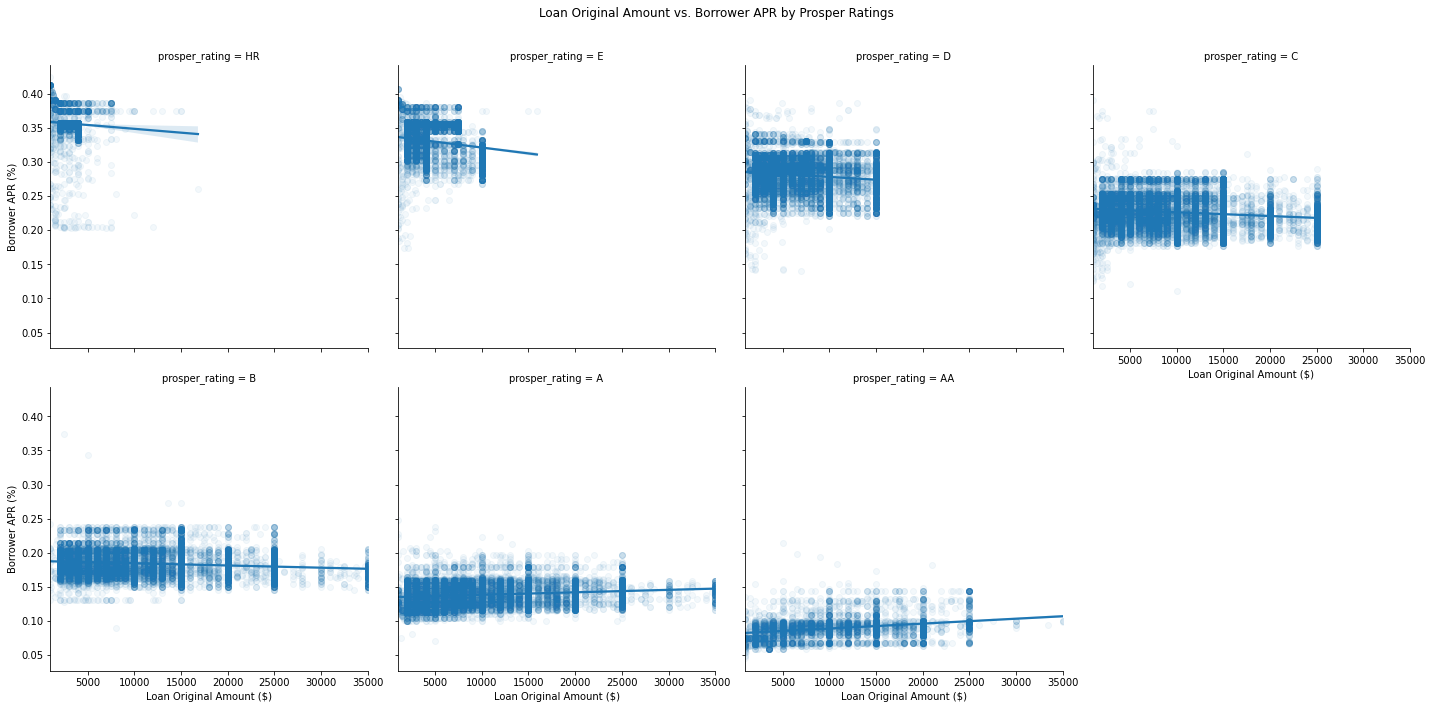

In [55]:
# create faceted scatterplots with fitted regression line on levels of the prosper rating variable
g = sb.FacetGrid(data = loan, col = 'prosper_rating', col_wrap = 4, height = 5);
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':1/20});
g.set_xlabels('Loan Original Amount ($)');
g.set_ylabels('Borrower APR (%)');
g.fig.suptitle("Loan Original Amount vs. Borrower APR by Prosper Ratings");
g.fig.subplots_adjust(top=0.9);

We can see that as the prosper rating gets higher, the correlation between borrower APR and loan original amount gets reversed gradually from a negative correlation to a positive correlation. This implies that for people with higher prosper ratings: A and AA, as the loan amount increases, the borrower APR increases. In other words, well-off people get charged higher rates as the loan value increases. 
Moreover, as the prosper rating gets higher, the original loan amount gets higher and so does the borrower APR.

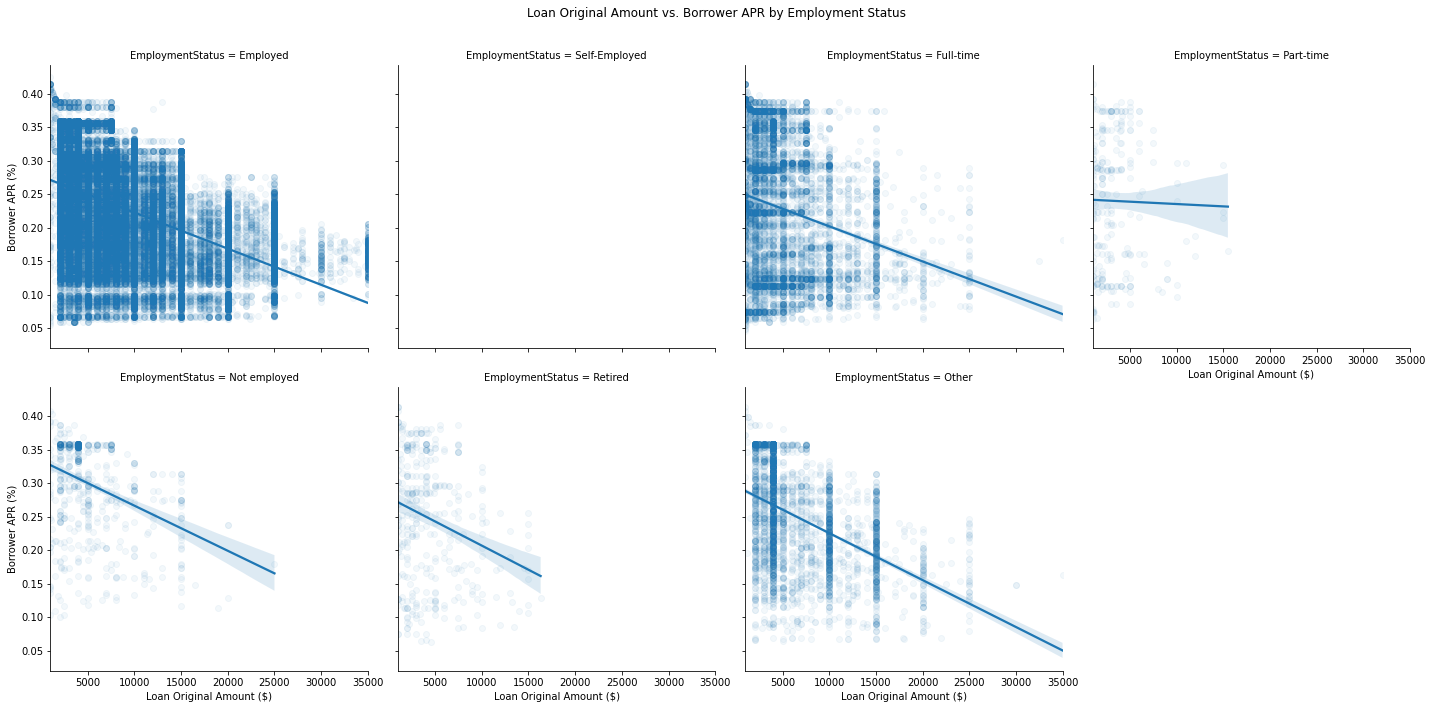

In [56]:
# create faceted scatterplots with fitted regression line on levels of the employment status variable
g = sb.FacetGrid(data = loan, col = 'EmploymentStatus', col_wrap = 4, height = 5);
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':1/20});
g.set_xlabels('Loan Original Amount ($)');
g.set_ylabels('Borrower APR (%)');
g.fig.suptitle("Loan Original Amount vs. Borrower APR by Employment Status");
g.fig.subplots_adjust(top=0.9);

The negative relationship between Borrower APR and Loan original amount remains consistent through all the Employment Statuses. However, the loan original amount seems to be lower for part-time, non-employed and retired people than employed and full-time employees and the borrower APR seems consistent throughout. 

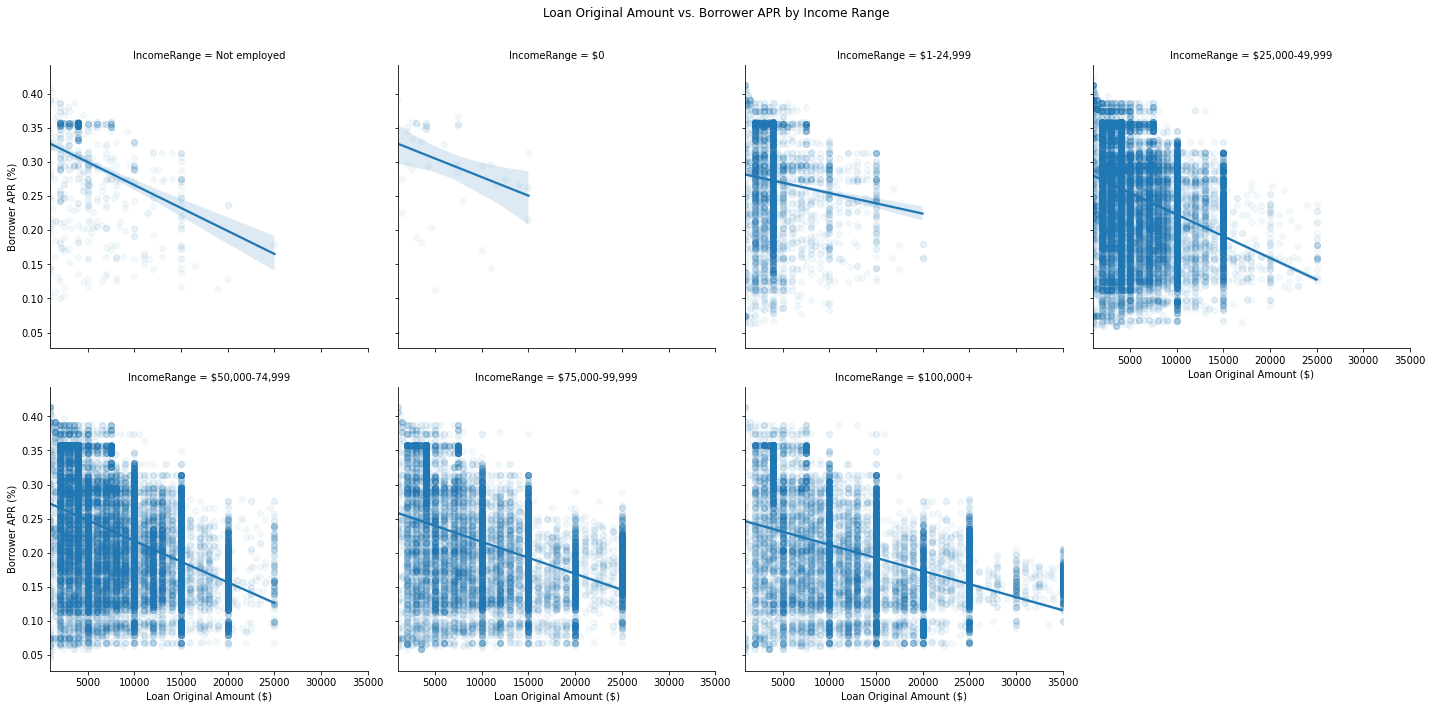

In [57]:
# create faceted scatterplots with fitted regression line on levels of the income range variable
g = sb.FacetGrid(data = loan, col = 'IncomeRange', col_wrap = 4, height = 5);
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':1/20});
g.set_xlabels('Loan Original Amount ($)');
g.set_ylabels('Borrower APR (%)');
g.fig.suptitle("Loan Original Amount vs. Borrower APR by Income Range");
g.fig.subplots_adjust(top=0.9);

The negative relationship between Borrower APR and Loan original amount remains consistent through all the Income Ranges. However, as the income range increases, the loan amount increases and the borrower APR reaches much lower levels.

**Given that we've already established the negative relationship between borrrower APR and Loan original amount, let's dig a little deeper by exploring how borrower APR changes across prosper rating and income range.**

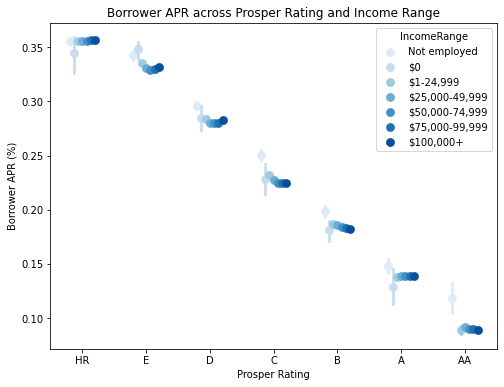

In [58]:
#plotting dodged point plot 
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan, x = 'prosper_rating', y = 'BorrowerAPR', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge = 0.4);
plt.title('Borrower APR across Prosper Rating and Income Range');
plt.xlabel("Prosper Rating");
plt.ylabel("Borrower APR (%)");
plt.show();

From the above plot, we can see that Borrower APR decreases as prosper rating increases, however, income ranges don't seem to change much with prosper rating as borrower APR decreases. The large error bar on the left side at HR is due to the fact that they are fewer loans with a prosper rating of HR and an income of 0. 

**Next, let's explore how borrower APR changes across prosper rating and employment status.**

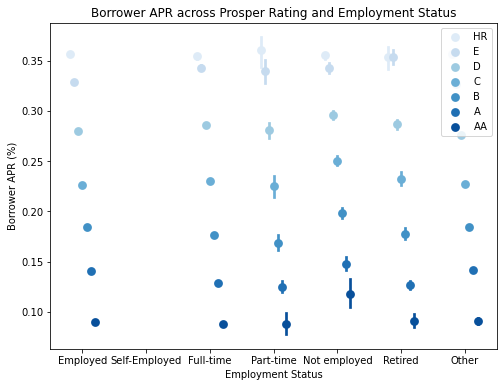

In [59]:
#plotting dodged point plot 
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan, x = 'EmploymentStatus', y = 'BorrowerAPR', hue = 'prosper_rating',
           palette = 'Blues', linestyles = '', dodge = 0.4);
plt.title('Borrower APR across Prosper Rating and Employment Status');
plt.xlabel("Employment Status");
plt.ylabel("Borrower APR (%)");
plt.legend(loc='upper right')
plt.show();

From the above plot, we can see that for an employment status, let's say employed, the borrower APR decreases as the prosper rating increases. This relationship is much more evident in this plot than all of our previous plots as customers are divided by employment status. Moreoever, we can see that there is no relationship between prosper ratings and employment statuses, as for each employment status the ratings seem to be equally divided. Lastly, if we look at the part-time employment status, we can see that there are a lot of error bars indicating that there is probably not a lot of part-timers in our dataset.  

**Next, let's see how borrower APR changes across prosper ratings and defaulting rates.**

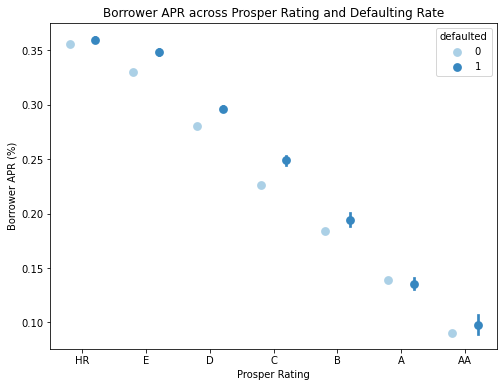

In [60]:
#plotting dodged point plot 
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan, x = 'prosper_rating', y = 'BorrowerAPR', hue = 'defaulted',
           palette = 'Blues', linestyles = '', dodge = 0.4);
plt.title('Borrower APR across Prosper Rating and Defaulting Rate');
plt.xlabel("Prosper Rating");
plt.ylabel("Borrower APR (%)");
plt.show();

As we can see from the previous plot, there is a negative relationship between borrower apr and prosper rating and on average for each prosper rating, people who defaulted had a higher borrower APR.  

**Next up, let's see how the relationship between borrower APR and prosper rating changes across defaulting categories.**

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


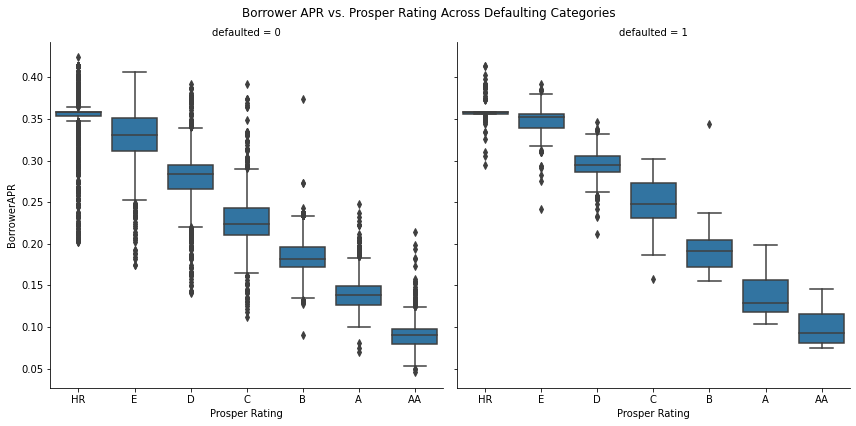

In [61]:
#plotting box plot 
g = sb.FacetGrid(data = loan, col = 'defaulted', height = 6);
g.map(sb.boxplot, 'prosper_rating', 'BorrowerAPR');
g.fig.suptitle("Borrower APR vs. Prosper Rating Across Defaulting Categories");
g.fig.subplots_adjust(top=0.9);
g.axes[0,0].set_xlabel('Prosper Rating');
g.axes[0,1].set_xlabel('Prosper Rating');

From the above plot, we can see that for both customers who defaulted and those who didn't default, the negative relationship between borrower APR and prosper rating remained the same. We can also see that for customers who didn't default, the range of borrower APR is much larger for each prosper rating than it is for customers who defaulted.

**Next, let's take a look at the relationship between loan original amount and borrower APR for those who defaulted and those who didn't.**

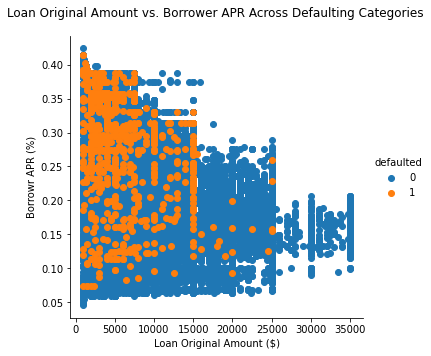

In [62]:
#plotting scatter plot with a hue 
g = sb.FacetGrid(data = loan, hue = 'defaulted', height = 5);
g.map(plt.scatter, 'LoanOriginalAmount','BorrowerAPR');
g.fig.suptitle("Loan Original Amount vs. Borrower APR Across Defaulting Categories");
g.fig.subplots_adjust(top=0.9);
plt.xlabel("Loan Original Amount ($)")
plt.ylabel("Borrowr APR (%)")
g.add_legend();

From the above plot, we can see that those who didn't default had on average higher loan amounts and lower APRs than those who defaulted, which makes sense given the observations we've had so far. Let's add in the prosper rating to see if our observations change.

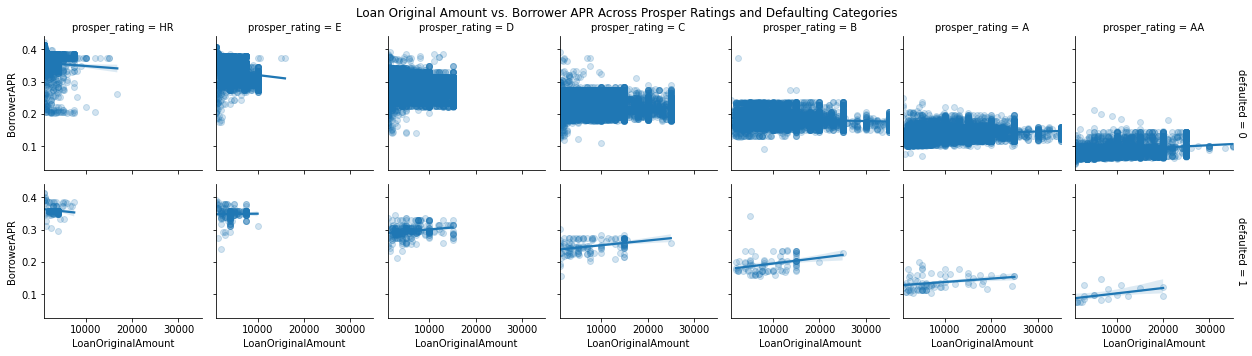

In [63]:
#plotting scatter plot with across two categorical variables
g = sb.FacetGrid(data = loan, row = 'defaulted', col = 'prosper_rating', height = 2.5, margin_titles = True);
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR',  x_jitter=0.3, scatter_kws={'alpha':1/5});
g.fig.suptitle("Loan Original Amount vs. Borrower APR Across Prosper Ratings and Defaulting Categories");
g.fig.subplots_adjust(top=0.9);

By adding in the prosper rating variable, we see the relationship between borrower apr and loan original amount across both defaulting categories even more clearly. For both defaulting categories, the negative relationship between borrower apr and loan original amount remains strong across al prosper ratings. 

**Lastly, since we're mainly interested in customers who defaulted, we'll plot a scatter plot of loan original amount and borrower APR by prosper rating for customers who defaulted.**

In [64]:
#dividing our df into defaulted and did not default 
defaulted = loan.loc[loan['defaulted'] == 1]
did_not = loan.loc[loan['defaulted'] == 0]

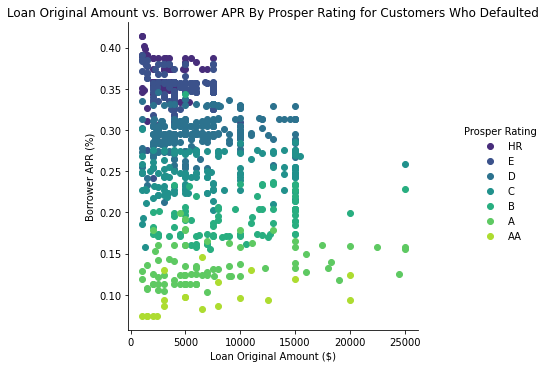

In [65]:
#plotting scatterplot
g = sb.FacetGrid(data= defaulted, hue = 'prosper_rating', height = 5, palette = 'viridis');
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR');
g.add_legend(title ="Prosper Rating");
plt.xlabel("Loan Original Amount ($)")
plt.ylabel("Borrower APR (%)")
plt.title("Loan Original Amount vs. Borrower APR By Prosper Rating for Customers Who Defaulted");

Here, we reach our most surprising observation, if we divide customers into defaulted and did not default, the established negative relationship between Borrower APR and Loan Original Amount turns gradually into a positive relationship across all prosper ratings. However, the negative relationship between Borrower APR and prosper rating remains constant.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration showed the following: 
- For customers who defaulted, the negative relationship between Borrower APR and Loan Original Amount turns gradually into a positive relationship across all prosper ratings. 
- As the prosper rating gets higher, the correlation between borrower APR and loan original amount gets reversed gradually from a negative correlation to a positive correlation, which is interesting but can be explained by the fact that well-off people get charged higher rates as the loan value increases.
- Both Employment Status and Income Range have no effect on the negative relationship between borrower APR and Loan Original Amount. 
- Borrower APR decreases as prosper rating increases, however, income ranges don't seem to change much with prosper rating as borrower APR decreases. 
- Those who didn't default had on average higher loan amounts and lower APRs than those who defaulted.
- On average for each prosper rating, people who defaulted had a higher borrower APR.
### Were there any interesting or surprising interactions between features?

> The multivariate exploration showed the following:
- The loan original amount seems to be lower for part-time, non-employed and retired people than employed and full-time employees and the borrower APR seems consistent throughout.
- As the income range increases, the loan amount increases and the borrower APR reaches much lower levels.
- Interestingly, there seems to be no relationship between prosper ratings and employment statuses, as for each employment status the ratings seem to be equally divided.
- For both customers who defaulted and those who didn't default, the negative relationship between borrower APR and prosper rating remained the same.